BY : **Fatima Awadhallah Alsulami -Amnah Awadhallah Alsulami**

# Import Libraries 

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.callbacks import EarlyStopping

# for metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

# READ DATA 

In [ ]:
Train = pd.read_csv('/content/Train_NLP.csv', sep=';')
Test=pd.read_csv('/content/Test_NLP.csv', sep=';')

# DATA EXPLORING

In [ ]:
Train.tail()

,Target,Tweets
49151,neg,عقباللي 💔
49152,neg,بالكذب 🤔
49153,neg,الجو يبي له تلبس جاكيت ✋
49154,neg,عنصريه علينا 😔
49155,neg,ابو 😭


In [ ]:
Train.head()

,Target,Tweets
0,pos,الي يتابعني من زمان يعرف اني ما حفزت على الحضو...
1,pos,رسميا اختربت نومتي 😀
2,pos,عيونك وطن وأكثر وطن شد انتباهي 😌
3,pos,وحده تهز 👍
4,pos,شهور الله يهديك يا حليمه لا تحطين قلوب صفراء ع...


In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49156 entries, 0 to 49155
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  49156 non-null  object
 1   Tweets  49156 non-null  object
dtypes: object(2)
memory usage: 768.2+ KB


In [ ]:
Test.head()

,Target,Tweets
0,pos,#دخون_الدعوه قال الله ﷻ :- _*​﴿واسجد واقترب﴾*_...
1,pos,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
2,pos,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
3,pos,هواشو البته 😁
4,pos,الحمد لله .. كانت مباراه صعبه ولكن بتوفيق الله...


In [ ]:
Test.tail()

,Target,Tweets
12285,neg,خلاص سكتو أنور مايرضى 🌚
12286,neg,هه 😭
12287,neg,#خرووج. لنا لقاء ان شاءالله. ✋ #متابعيني_الغالين.
12288,neg,#الوتر_جنة_القلوب سبحانك آللهم و بحمدك أشهد أن...
12289,neg,اللهم أرحم من أصبح في ودائعك وبرد على قبره وأع...


In [ ]:
Train.isnull()

,Target,Tweets
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
49151,False,False
49152,False,False
49153,False,False
49154,False,False


In [ ]:
Train["Target"]

0        pos
1        pos
2        pos
3        pos
4        pos
        ... 
49151    neg
49152    neg
49153    neg
49154    neg
49155    neg
Name: Target, Length: 49156, dtype: object

In [ ]:
Train["Tweets"]

0        الي يتابعني من زمان يعرف اني ما حفزت على الحضو...
1                                     رسميا اختربت نومتي 😀
2                         عيونك وطن وأكثر وطن شد انتباهي 😌
3                                               وحده تهز 👍
4        شهور الله يهديك يا حليمه لا تحطين قلوب صفراء ع...
                               ...                        
49151                                            عقباللي 💔
49152                                             بالكذب 🤔
49153                             الجو يبي له تلبس جاكيت ✋
49154                                       عنصريه علينا 😔
49155                                                ابو 😭
Name: Tweets, Length: 49156, dtype: object

# PREPROCESSING

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
Train.Target= labelencoder.fit_transform(Train.Target.values)

In [ ]:
Test.Target= labelencoder.fit_transform(Test.Target.values)

In [ ]:
Train["Target"]

0        1
1        1
2        1
3        1
4        1
        ..
49151    0
49152    0
49153    0
49154    0
49155    0
Name: Target, Length: 49156, dtype: int64

In [ ]:
Train

,Target,Tweets
0,1,الي يتابعني من زمان يعرف اني ما حفزت على الحضو...
1,1,رسميا اختربت نومتي 😀
2,1,عيونك وطن وأكثر وطن شد انتباهي 😌
3,1,وحده تهز 👍
4,1,شهور الله يهديك يا حليمه لا تحطين قلوب صفراء ع...
...,...,...
49151,0,عقباللي 💔
49152,0,بالكذب 🤔
49153,0,الجو يبي له تلبس جاكيت ✋
49154,0,عنصريه علينا 😔


In [ ]:
Test

,Target,Tweets
0,1,#دخون_الدعوه قال الله ﷻ :- _*​﴿واسجد واقترب﴾*_...
1,1,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...
2,1,السحب الليلة على الايفون .. رتويت للمرفقة وطبق...
3,1,هواشو البته 😁
4,1,الحمد لله .. كانت مباراه صعبه ولكن بتوفيق الله...
...,...,...
12285,0,خلاص سكتو أنور مايرضى 🌚
12286,0,هه 😭
12287,0,#خرووج. لنا لقاء ان شاءالله. ✋ #متابعيني_الغالين.
12288,0,#الوتر_جنة_القلوب سبحانك آللهم و بحمدك أشهد أن...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of positive and negative messages')

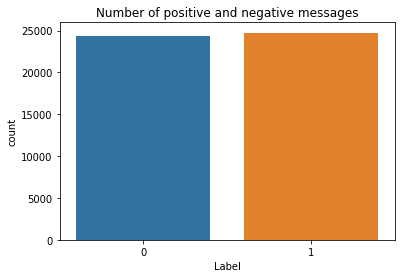

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(Train.Target)
plt.xlabel('Label')
plt.title('Number of positive and negative messages')

In [ ]:
#correlation study
corr_matrix=Train.corr()
corr_matrix

,Target
Target,1.0


In [ ]:
# most frequent words
# A counter tool is provided to support convenient 
# and rapid counting and summing operations.

from collections import Counter
Counter(" ".join(Train["Tweets"]).split()).most_common(20)

[('من', 10161),
 ('في', 7498),
 ('الله', 6384),
 ('..', 6247),
 ('و', 5296),
 ('💔', 5134),
 ('على', 5032),
 ('.', 4002),
 ('لا', 3854),
 ('ما', 3640),
 ('،', 3585),
 ('😂', 2865),
 ('كل', 2772),
 ('يا', 2693),
 ('💙', 2564),
 ('اللهم', 2243),
 (':', 2190),
 ('-', 2061),
 ('ولا', 2061),
 ('😭', 2033)]

In [ ]:
#Check if there is any duplicated rows
#Baased on output, there is duplication
dup_rows = Train[Train.duplicated(subset=None, keep='first')]
dup_rows

,Target,Tweets
121,1,- الإيمان القوي يسكت الخوف الداخلي . 🌿
146,1,هذا انا اقول لكم القادم يسركم ما رجعنا علشان ن...
148,1,#تأمل قال الله ﷻ :- _*​﴿بواد غير ذي زرع ﴾*_ 💫💫...
177,1,بمناسبة فوز الهلال .. 💙 سحب على آيفون XR📱 رتوي...
198,1,قوتنا بعد الله دائما أنتم🌹💙 الف مبرووك 💙 الحمد...
...,...,...
49140,0,لاتلومه 🐸 الخيخه الامعه
49142,0,شمالي وين وهو يفك علينا الشكمان 😷
49143,0,مرصد الأزهر ده تخصص هوليجنز بس ؟؟ ماعندوش حد. ...
49145,0,حتى فيكلوب قبل العوده قلت احس بناخذ باك واخذنا...


In [ ]:
#Duplicated rows has been removed
Train.drop_duplicates(subset=None, keep='first',inplace=True)
remove_dup_rows = Train[Train.duplicated(subset=None, keep='first')]
remove_dup_rows

,Target,Tweets


In [ ]:
Train

,Target,Tweets
0,1,الي يتابعني من زمان يعرف اني ما حفزت على الحضو...
1,1,رسميا اختربت نومتي 😀
2,1,عيونك وطن وأكثر وطن شد انتباهي 😌
3,1,وحده تهز 👍
4,1,شهور الله يهديك يا حليمه لا تحطين قلوب صفراء ع...
...,...,...
49150,0,انتي متزوجة 🤔
49151,0,عقباللي 💔
49152,0,بالكذب 🤔
49154,0,عنصريه علينا 😔


In [ ]:
hashtags = Train.Tweets.str.extractall(r'(\#\w+)')

In [ ]:
hashtags = Test.Tweets.str.extractall(r'(\#\w+)')

In [ ]:
type(hashtags)

pandas.core.frame.DataFrame

In [ ]:
hashtags.head()

0
   match                              
0  0                      #دخون_الدعوه
7  0      #غرد_بذكر_الله_يفرج_الله_همك
8  0                    #الهلال_الاهلي
   1                           #الهلال
19 0                            #بوتاس

In [ ]:
hashtags = hashtags[0].value_counts()
hashtags.head(10)

#الهلال             116
#الهلال_الاهلي       86
#النصر_الاتحاد       62
#الاتحاد_النصر       60
#الاتحاد             50
#صباح_الخير          45
#الاهلي_الهلال       37
#حسين_عبدالغني       34
#مناحل_ابو_سلطان     32
#وش_يقول_الليل       25
Name: 0, dtype: int64

In [ ]:
# Check NaNs
Train.isnull().sum()

Target    0
Tweets    0
dtype: int64

In [ ]:
Test.isnull().sum()

Target    0
Tweets    0
dtype: int64

In [ ]:
# Check Duplicates
Train.duplicated().sum()

0

In [ ]:
# . All Punctuations

import string 

arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ»«•'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

# helpful function

def strip_tags_and_punctuations(text):
    mention_and_hashtag_prefixes = ['@','#']

    # remove mentions and hashtags
    words = []
    for word in text.split():
        word = word.strip()
        if len(word) != 1:
            if word[0] not in mention_and_hashtag_prefixes and word[1] not in mention_and_hashtag_prefixes: 
                words.append(word)
        else:
            if word[0] not in mention_and_hashtag_prefixes:
                words.append(word)
        text = ' '.join(words)
    
    # replace all punctuations except the above with space
    for separator in  punctuations_list:
        if separator not in mention_and_hashtag_prefixes:
            text = text.replace(separator,' ')

    return text

In [ ]:
!pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#rimport pyarabic.araby as araby
import re
import pyarabic.araby as araby
def normalizeArabic(text):
    text = text.strip()
    text = re.sub("[إأٱآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)

# CAMeL Tools
For some of our preprocessing, we will use CAMeL Tools, a specialized natural language processing tool for Arabic preprocessing

In [ ]:
!pip install camel-tools 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from camel_tools.utils.dediac import dediac_ar

from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar

from camel_tools.tokenizers.word import simple_word_tokenize

import emoji

from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer

In [ ]:
def normalize_dediac(text):
    
    text = normalize_alef_maksura_ar(text)
    text = normalize_alef_ar(text)
    text = normalize_teh_marbuta_ar(text)
    
    # Dediacritization
    text = dediac_ar(text)
    return text

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# . Removing stop words

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = nltk.corpus.stopwords.words("arabic")

def remove_stopwords(text):
    
    text_tokenized = word_tokenize(text)
    text_no_stop = [word for word in text_tokenized if word not in stop_words]
    
    return " ".join(text_no_stop)

In [ ]:

print('Before:', Train['Tweets'][50])
print('After:', strip_tags_and_punctuations(Train['Tweets'][50]))

Before: اللهم صل وسلم على نبينا محمد ﷺ عدد ماذكره الذاكرون وعدد ماغفل عن ذكره الغافلون ♡ . #تغريده_بصلاتك_علي_نبينا_محمد .
After: اللهم صل وسلم على نبينا محمد ﷺ عدد ماذكره الذاكرون وعدد ماغفل عن ذكره الغافلون ♡    


In [ ]:
print('Before:', Train['Tweets'][100])
print('After:', normalize_dediac(Train['Tweets'][100]))

Before: مبروك الفوز يا زعماء فريق يفشل بس يلا فوز وثلاث نقاط و #صداره_بس 💙
After: مبروك الفوز يا زعماء فريق يفشل بس يلا فوز وثلاث نقاط و #صداره_بس 💙


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
Train['Tweets'] = Train['Tweets'].apply(strip_tags_and_punctuations)
Train['Tweets'] = Train['Tweets'].apply(normalize_dediac)
Train['Tweets'] = Train['Tweets'].apply(remove_stopwords)
Train['Tweets'] = Train['Tweets'].apply(normalizeArabic)

In [ ]:
Test['Tweets'] = Test['Tweets'].apply(strip_tags_and_punctuations)
Test['Tweets'] = Test['Tweets'].apply(normalize_dediac)
Test['Tweets'] = Test['Tweets'].apply(remove_stopwords)
Test['Tweets'] = Test['Tweets'].apply(normalizeArabic)

In [ ]:
Train

,Target,Tweets
0,1,الي يتابعني زمان يعرف اني حفزت علي الحضور هالم...
1,1,رسميا اختربت نومتي 😀
2,1,عيونك وطن واكثر وطن شد انتباهي 😌
3,1,وحده تهز 👍
4,1,شهور الله يهديك حليمه تحطين قلوب صفراء اسمك 😂 ...
...,...,...
49150,0,انتي متزوجه 🤔
49151,0,عقباللي 💔
49152,0,بالكذب 🤔
49154,0,عنصريه علينا 😔


# Model

In [ ]:
X_train = Train['Tweets']
y_train = Train['Target']

X_test = Test['Tweets']
y_test = Test['Target']

## LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
# from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

max_words = 1000 
max_len = 150 
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences,maxlen=max_len)

In [ ]:
from keras import Model
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(128)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('LeakyReLU')(layer)
    layer = Dropout(0.4)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 128)               91648     
                                                                 
 FC1 (Dense)                 (None, 256)               33024     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [ ]:
history = model.fit(sequences_matrix, y_train, batch_size=32, epochs=30,
          validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss', patience=10)])

Epoch 1/30
804/804 [==============================] - 161s 198ms/step - loss: 0.2993 - accuracy: 0.8733 - val_loss: 0.2561 - val_accuracy: 0.8373
Epoch 2/30
804/804 [==============================] - 159s 198ms/step - loss: 0.2418 - accuracy: 0.8958 - val_loss: 0.2457 - val_accuracy: 0.8454
Epoch 3/30
804/804 [==============================] - 158s 197ms/step - loss: 0.2139 - accuracy: 0.9038 - val_loss: 0.2091 - val_accuracy: 0.8619
Epoch 4/30
804/804 [==============================] - 159s 197ms/step - loss: 0.2047 - accuracy: 0.9080 - val_loss: 0.2809 - val_accuracy: 0.8281
Epoch 5/30
804/804 [==============================] - 158s 196ms/step - loss: 0.2032 - accuracy: 0.9087 - val_loss: 0.2528 - val_accuracy: 0.8417
Epoch 6/30
804/804 [==============================] - 158s 196ms/step - loss: 0.2004 - accuracy: 0.9097 - val_loss: 0.2381 - val_accuracy: 0.8610
Epoch 7/30
804/804 [==============================] - 158s 196ms/step - loss: 0.1997 - accuracy: 0.9089 - val_loss: 0.2813 -

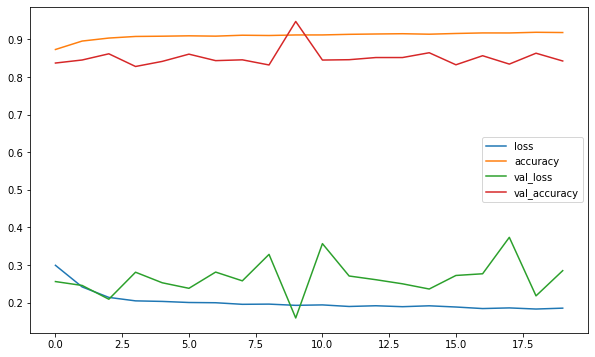

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10, 6))

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix, y_test)

385/385 [==============================] - 21s 56ms/step - loss: 0.2400 - accuracy: 0.8915


In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.240
  Accuracy: 0.891
